<a href="https://colab.research.google.com/github/AntonThai2022/ML/blob/main/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import math
import tensorflow as tf
from matplotlib import pyplot as plt

Создаём по 100 точек для бинарной классификации (кол-во точек можно менять)

In [ ]:
N = 200
x_zeros = np.random.multivariate_normal(mean=np.array((-1,-1)), cov=.1*np.eye(2), size=(int(N/2),))
y_zeros = np.zeros((int(N/2),))
x_ones = np.random.multivariate_normal(mean=np.array((1,1)), cov=.1*np.eye(2), size=(int(N/2),))
y_ones = np.ones((int(N/2), ))
x_np = np.vstack([x_zeros, x_ones])
y_np = np.concatenate([y_zeros, y_ones])

Визуализируем точки

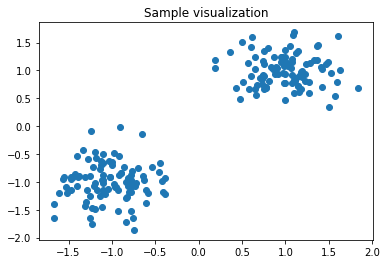

In [ ]:
#Визуализируем по оси все первые координаты каждой точки, а по другой оси все вторые координаты каждой точки 
plt.scatter(x_np[:,0], x_np[:,1])
plt.title("Sample visualization")
plt.show()

Определяем модель логистической регрессии

In [ ]:
tf.compat.v1.disable_eager_execution() 
with tf.name_scope("placaholders"):
  x = tf.compat.v1.placeholder(tf.float32, (N,2))
  y = tf.compat.v1.placeholder(tf.float32, (N,))
with tf.name_scope("weights"):
  W = tf.compat.v1.Variable(tf.compat.v1.random_normal((2,1)))
  b = tf.compat.v1.Variable(tf.compat.v1.random_normal((1,)))
with tf.name_scope("prediction"):
  y_logit = tf.compat.v1.squeeze(tf.compat.v1.matmul(x,W) + b)
  y_one_prob = tf.compat.v1.sigmoid(y_logit)
  y_pred = tf.round(y_one_prob)

with tf.name_scope("loss"):
  entropy = tf.nn.sigmoid_cross_entropy_with_logits(logits=y_logit, labels=y)
  l = tf.reduce_sum(entropy)
with tf.name_scope("optim"):
  train_op = tf.compat.v1.train.AdamOptimizer(.01).minimize(l)

Тренировка ллогистической регрессии

In [ ]:
n_steps = 1000
with tf.compat.v1.Session() as sess:
  sess.run(tf.compat.v1.global_variables_initializer())
  for i in range(n_steps):
    summary, loss = sess.run([train_op, l], feed_dict={x: x_np, y: y_np})
    if(i % 100 == 0):
      print("потеря: %f" % loss) 
  W_value = W.eval() 
  b_value = b.eval()  

потеря: 126.711388
потеря: 28.816486
потеря: 12.277152
потеря: 7.247461
потеря: 4.986942
потеря: 3.738020
потеря: 2.955667
потеря: 2.422764
потеря: 2.037611
потеря: 1.746794


Визуализируем разделяющую линию, 

In [ ]:
#Получаем значения весов в виде обычного списка
W_val = np.reshape(W_value, (1,2))[0]
#И смещение
b_val = b_value[0]
#Определяем сигмоиду
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

#Теперь перебирам кучу точек из интереующеей области, и те из них, на которых регрессия выдаёт результат
#близкий к 0.5 будут являться толчками линии, которая и разделяет наши классы
x1, x2 = [], []
for x1_test in np.linspace(-1.5,1.5, 100):
  for x2_test in np.linspace(-1.5,1.5, 100):
    #попробуй ради интереса поменяй местами индексы у весов
    z = sigmoid(x1_test*W_val[0] + x2_test*W_val[1] + b_val)
    if abs(z - 0.5) < 0.01:
      x1.append(x1_test)
      x2.append(x2_test)

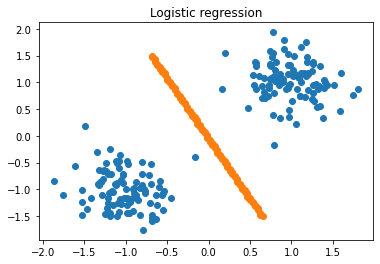

In [ ]:
#Теперь делаем из наших списков numpy массивы и отрисовываем линию
plt.scatter(x_np[:,0], x_np[:,1]) #точки данных
plt.scatter(x1, x2) #теоретические точки, где регрессия уже может ошибиться, то есть линия, разделяющая данные
plt.title("Logistic regression")
plt.show()